In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

import datetime
import os
import cv2

import tensorflow as tf
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

In [2]:
from keras import regularizers
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils.vis_utils import plot_model

from sklearn.metrics import classification_report, confusion_matrix

main_accent_colour = "#b366ff"
dim_colour="darkgrey"
main_palette = ["#FBE5C0", "#DD9A30", "#F88379", "#FF6FC2", "purple", 
                "#D086F6", "#B0D2C2", "#4C5D70", "#6FA2CE", "#382D24", "#3ACF3A", "#7D7D00"]

In [3]:
train_dir = 'C:\\Users\\HP\\Desktop\\songsrecommendation\\dataset\\train\\'
test_dir = 'C:\\Users\\HP\\Desktop\\songsrecommendation\dataset\\test\\'

row = 48
col = 48
classes = len(os.listdir('C:\\Users\\HP\\Desktop\\songsrecommendation\\dataset\\train\\'))

In [4]:
print("Train Set :")

train_count = []
for folder in os.listdir(train_dir) :
    print(folder, "folder contains\t\t", len(os.listdir(train_dir+folder)), "image")
    train_count.append(len(os.listdir(train_dir+folder)))
    
print()

test_count = []
print("Test Set :")
for folder in os.listdir(test_dir) :
    print(folder, "folder contains\t\t", len(os.listdir(test_dir+folder)), "images")
    test_count.append(len(os.listdir(test_dir+folder)))

Train Set :
Calm folder contains		 1473 image
Happy folder contains		 1653 image
Sad folder contains		 4409 image

Test Set :
Calm folder contains		 262 images
Happy folder contains		 151 images
Sad folder contains		 451 images


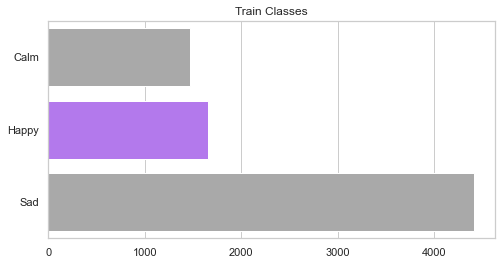

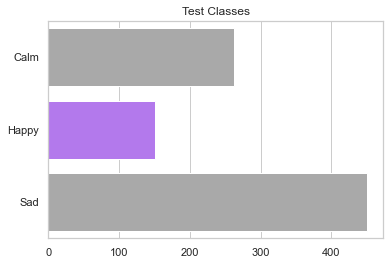

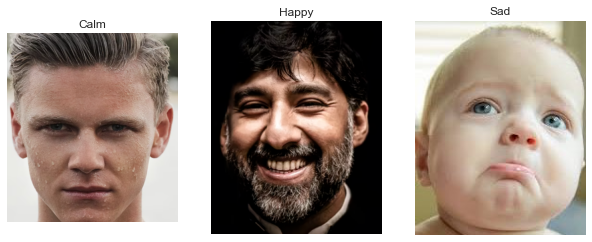

In [5]:
vals = ["Happy"]
palette = {c: dim_colour if c not in vals else main_accent_colour for c in os.listdir(train_dir)}

plt.figure(figsize=(8,4))

ax = sns.barplot(y=os.listdir(train_dir),
                 x=train_count,
                 palette=palette,
                 orientation="horizontal",
).set(title='Train Classes')

plt.show()
print()

ax = sns.barplot(y=os.listdir(test_dir),
                 x=test_count,
                 palette=palette,
                 orientation="horizontal",
).set(title='Test Classes')

plt.show()

print()

plt.figure(figsize=(25,25))

i = 1
for folder in os.listdir(train_dir):
    
    img = load_img((train_dir + folder +'/'+ os.listdir(train_dir + folder)[1]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(folder)
    plt.axis('off')
    i += 1
    
plt.show()

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   horizontal_flip=True)

training_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(test_dir,
                                               batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 7535 images belonging to 3 classes.
Found 864 images belonging to 3 classes.


In [7]:
training_set.class_indices


{'Calm': 0, 'Happy': 1, 'Sad': 2}

In [8]:
def get_model(input_size, classes=7):
    
    model = tf.keras.models.Sequential()   

    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape =input_size))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(classes, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.0001, decay=1e-6), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

In [9]:
fernet = get_model((row,col,1), classes)
fernet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       7

In [10]:
plot_model(fernet, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [11]:
import keras 
from tensorflow.keras import layers
inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation="softmax", name="predictions")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [12]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]


In [13]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [14]:
print("Fit model on training data")
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=50,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_val, y_val),
)

Fit model on training data
Epoch 1/50
782/782 [==============================] - 12s 4ms/step - loss: 0.3403 - sparse_categorical_accuracy: 0.9030 - val_loss: 0.1891 - val_sparse_categorical_accuracy: 0.9472
Epoch 2/50
782/782 [==============================] - 3s 3ms/step - loss: 0.1625 - sparse_categorical_accuracy: 0.9512 - val_loss: 0.1350 - val_sparse_categorical_accuracy: 0.9616
Epoch 3/50
782/782 [==============================] - 3s 4ms/step - loss: 0.1201 - sparse_categorical_accuracy: 0.9642 - val_loss: 0.1203 - val_sparse_categorical_accuracy: 0.9660
Epoch 4/50
782/782 [==============================] - 3s 4ms/step - loss: 0.0973 - sparse_categorical_accuracy: 0.9707 - val_loss: 0.1269 - val_sparse_categorical_accuracy: 0.9650
Epoch 5/50
782/782 [==============================] - 3s 4ms/step - loss: 0.0810 - sparse_categorical_accuracy: 0.9751 - val_loss: 0.1102 - val_sparse_categorical_accuracy: 0.9688
Epoch 6/50
782/782 [==============================] - 3s 4ms/step - loss

782/782 [==============================] - 3s 3ms/step - loss: 0.0019 - sparse_categorical_accuracy: 0.9994 - val_loss: 0.2761 - val_sparse_categorical_accuracy: 0.9739
Epoch 47/50
782/782 [==============================] - 3s 4ms/step - loss: 0.0021 - sparse_categorical_accuracy: 0.9993 - val_loss: 0.2677 - val_sparse_categorical_accuracy: 0.9750
Epoch 48/50
782/782 [==============================] - 3s 4ms/step - loss: 0.0017 - sparse_categorical_accuracy: 0.9995 - val_loss: 0.2732 - val_sparse_categorical_accuracy: 0.9757
Epoch 49/50
782/782 [==============================] - 3s 4ms/step - loss: 0.0019 - sparse_categorical_accuracy: 0.9995 - val_loss: 0.2605 - val_sparse_categorical_accuracy: 0.9753
Epoch 50/50
782/782 [==============================] - 3s 3ms/step - loss: 0.0011 - sparse_categorical_accuracy: 0.9997 - val_loss: 0.2784 - val_sparse_categorical_accuracy: 0.9760


In [15]:
history.history


{'loss': [0.3403429388999939,
  0.16254977881908417,
  0.12011319398880005,
  0.09732011705636978,
  0.08099659532308578,
  0.06842829287052155,
  0.05903824046254158,
  0.05190430209040642,
  0.04567983001470566,
  0.03986730799078941,
  0.036568839102983475,
  0.032445020973682404,
  0.028413496911525726,
  0.025644447654485703,
  0.023151488974690437,
  0.019885795190930367,
  0.017627371475100517,
  0.016403982415795326,
  0.015012468211352825,
  0.014685929752886295,
  0.011868785135447979,
  0.010198474861681461,
  0.00967729464173317,
  0.008483938872814178,
  0.00793690886348486,
  0.007267381530255079,
  0.007145723793655634,
  0.006426857318729162,
  0.005394262261688709,
  0.004807608667761087,
  0.004812818020582199,
  0.004582921974360943,
  0.0044607920572161674,
  0.0044142091646790504,
  0.003165415022522211,
  0.003127876203507185,
  0.0030742157250642776,
  0.0035589297767728567,
  0.002709166146814823,
  0.0034497170709073544,
  0.002188940765336156,
  0.001993184443

In [16]:
model_json = model.to_json()
with open("mood2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("mood3.h5")
print("Saved model to disk")

Saved model to disk


In [18]:
mood_music = pd.read_csv("C:\\Users\\HP\\Desktop\\songsrecommendation\\archive\\data_moods.csv")
mood_music = mood_music[['name','artist','mood']]
mood_music.head()

,name,artist,mood
0,1999,Prince,Happy
1,23,Blonde Redhead,Sad
2,9 Crimes,Damien Rice,Sad
3,99 Luftballons,Nena,Happy
4,A Boy Brushed Red Living In Black And White,Underoath,Energetic


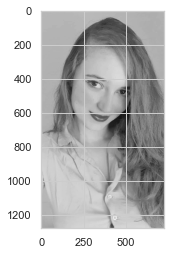

In [22]:
image = cv2.imread('C:\\Users\\HP\\Desktop\\songsrecommendation\\yassmine.JPG',cv2.IMREAD_GRAYSCALE)

plt.imshow(image,cmap='gray')
plt.show()

In [23]:
image = cv2.resize(image,(48,48))
img=np.array(image)
img=img.reshape(1,48,48,1)
predict_x=fernet.predict(img) 
result=np.argmax(predict_x,axis=1)
result[0]

1/1 [==============================] - 0s 62ms/step


1

In [24]:
if(result[0]==0  ):
    #for angery,disgust,fear
    filter1=mood_music['mood']=='Calm'
    f1=mood_music.where(filter1)
    f1=f1.dropna()
    f2 =f1.sample(n=5)
    f2.reset_index(inplace=True)
    display(f2)
if(result[0]==1):
    #for happy, neutral
    filter1=mood_music['mood']=='Happy'
    f1=mood_music.where(filter1)
    f1=f1.dropna()
    f2 =f1.sample(n=5)
    f2.reset_index(inplace=True)
    display(f2)
if(result[0]==2):
       #for Sad
    filter1=mood_music['mood']=='Sad'
    f1=mood_music.where(filter1)
    f1=f1.dropna()
    f2 =f1.sample(n=5)
    f2.reset_index(inplace=True)
    display(f2)



,index,name,artist,mood
0,123,Daar Gaat Ze,Clouseau,Happy
1,454,"Rocket Man (I Think It's Going To Be A Long, L...",Elton John,Happy
2,339,Me and Julio Down by the Schoolyard,Paul Simon,Happy
3,557,The Joker,Steve Miller Band,Happy
4,656,Worlds Collide - Edison Cole Remix,NERVO,Happy
